In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-whitegrid")

In [3]:
import seaborn as sns

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# EDA

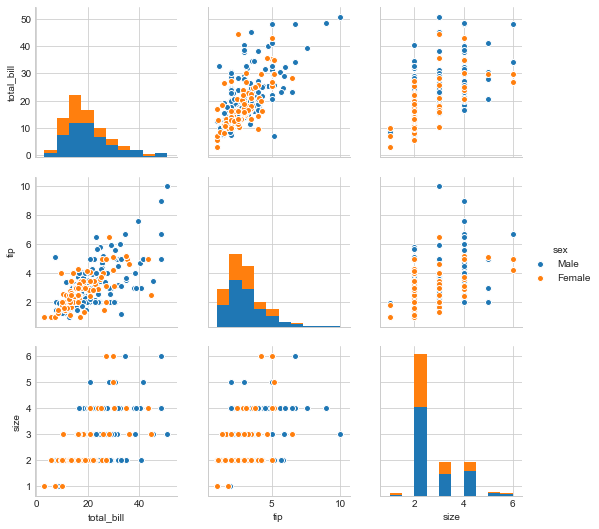

In [6]:
sns.pairplot(tips,'sex')
plt.show()

### Linear Regression
$ y = \beta_0 + \beta_1 x $

### where X is feature which is independent and y isn target to be predicted which depends on X and $ \beta_0


### Step2 --> split your data into Training and Testing Data set 

In [7]:
f1 = tips['total_bill']
f2 = tips[['total_bill']]

In [8]:
print(type(f1))
print(type(f2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
features = tips[['total_bill']]
target = tips['tip']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#help(train_test_split)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.33, random_state=42)

In [13]:
len(X_train)

163

In [14]:
len(X_test)

81

In [15]:
X_train.head()

,total_bill
114,25.71
65,20.08
132,11.17
207,38.73
162,16.21


In [16]:
y_train.head()

114    4.00
65     3.15
132    1.50
207    3.00
162    2.00
Name: tip, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin = LinearRegression() #creating a model

### Step 3 Train your model or fitting data to model

In [19]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lin.intercept_

0.8207989142570451

In [21]:
lin.coef_

array([0.112207])

### Lets find predicted values of y as $ \hat {y} $

In [22]:
y_pred = lin.predict(X_test)

In [23]:
y_pred[:5]

array([3.0447416 , 1.80485428, 3.5754807 , 3.72583807, 2.27948988])

In [24]:
np.array(y_test[:5])

array([3.18, 2.  , 2.  , 5.16, 2.  ])

In [25]:
np.array(X_test[:5])[:,0]

array([19.82,  8.77, 24.55, 25.89, 13.  ])

In [26]:
X_test[:5]

,total_bill
24,19.82
6,8.77
153,24.55
211,25.89
198,13.00


In [27]:
y_test[:5]

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
Name: tip, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test,y_pred)

0.7795244566068924

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.39917422434566985

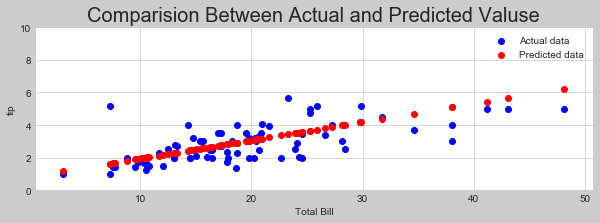

In [32]:
plt.figure(figsize=(10,3),facecolor="#cccccc")
plt.title("Comparision Between Actual and Predicted Valuse",fontsize=20)
plt.scatter(X_test,y_test,c="b",label='Actual data')
plt.scatter(X_test,y_pred,c='r',label="Predicted data")
plt.xlabel("Total Bill")
plt.ylabel("tip")
plt.ylim([0,10])`
plt.legend()
plt.show()

## Prediction of size based on total bill

In [57]:
feature = tips[['total_bill']]
target = tips['size']

In [58]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.5,random_state=68)

In [72]:
X_train.head()

,total_bill
170,50.81
25,17.81
194,16.58
102,44.30
227,20.45


In [73]:
y_train.head()

170    3
25     4
194    2
102    3
227    4
Name: size, dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lin = LinearRegression()

In [76]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
pred = lin.predict(X_test)

In [78]:
pred[:5]

array([2.69957398, 2.1448629 , 3.37702963, 3.29028226, 3.119148  ])

In [79]:
np.array(X_test[:5])[:,0]

array([22.82, 13.42, 34.3 , 32.83, 29.93])

In [80]:
np.array(y_test[:5])

array([3, 2, 6, 2, 4], dtype=int64)

In [82]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
mse

0.6191184134015029

In [83]:
r2_score(y_test,pred)

0.362065872961719

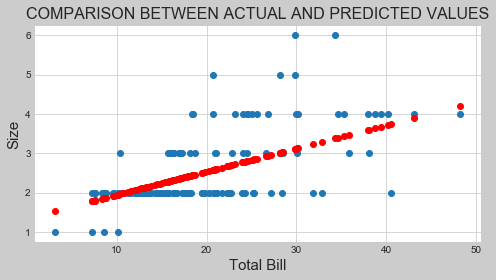

In [88]:
plt.figure(figsize=(8,4),facecolor="#cccccc")
plt.title("COMPARISON BETWEEN ACTUAL AND PREDICTED VALUES",fontsize=16)
plt.scatter(X_test,y_test)
plt.plot(X_test,pred,'ro')
plt.xlabel("Total Bill",fontsize=15)
plt.ylabel("Size",fontsize=15)
plt.show()

## Boston dataset

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [36]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [37]:
#print(boston["DESCR"])

In [38]:
features = pd.DataFrame(boston["data"],columns=boston["feature_names"])
target = pd.Series(boston['target'])

In [39]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
features.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [41]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.33, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred[:5]

array([28.54080212, 36.62565764, 15.64469728, 25.51062031, 18.69993288])

In [48]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [49]:
np.array(X_test[:5])[:,0]

array([0.09178, 0.05644, 0.10574, 0.09164, 5.09017])

In [50]:
x_test = X_test['CRIM']


In [51]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
dtype: float64

In [52]:
type(X_test)

pandas.core.frame.DataFrame

In [53]:
type(y_test)

pandas.core.series.Series

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

20.74714336030886

In [56]:
r2_score(y_test,y_pred)

0.725851581823006